In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas.api.types import is_numeric_dtype
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
#OVA :c Offensive Value
#POT : Potential
#BOV :
#CROSSING
#VOLLEY

Project Source:

https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring

In [3]:
df = pd.read_csv('fifa21 raw data v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

/var/folders/97/kcf9thns5z3_g34_y6xzwgkc0000gn/T/ipykernel_11197/1419749304.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa21 raw data v2.csv')


#  DATA CLEANING

Droping the column with too much null values

In [4]:
# 1/check the dimension of the dataframe
print(df.shape)

(18979, 77)


In [5]:
# 2/check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [6]:
# 3/check and revome any duplicate row
df.drop_duplicates(inplace=True)

In [7]:
# 4/Remove unnecessary columns(in this case with too much null values)
column_list = list(df.columns) # i put in a list all the df column names for my iteration
column_list

['ID',
 'Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 '↓OVA',
 'POT',
 'Club',
 'Contract',
 'Positions',
 'Height',
 'Weight',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits']

In [8]:
column_to_drop = []
for column in column_list:
    if df[column].isnull().sum() > int(len(df))/2:
        column_to_drop.append(column)  # i itereate my df, and  want to return all the column having more than 50% of null values
                                        # it's visually clear though..


In [9]:
column_to_drop # the junk column added to the list ask we asked

['Loan Date End']

In [10]:
df = df.drop('Loan Date End', axis=1)

In [11]:
# 5/good formating
  #Convert the height and weight columns to numerical forms
     # for that we need first to delate the measure units (cm, kg)
#df['Weight'] = df['Weight'].str.replace('kg', '') not optimal, a better option is following
#df['Height'] = df['Height'].str.replace('cm', '')

In [12]:
#we will use a function to make the conversion of the height:
def convert_to_cm(height):
    if "'" in height:  # Check if the height is in feet and inches
        feet, inches = height.split("'")
        inches = inches.rstrip('"')
        cm = (int(feet)*12 + int(inches)) * 2.54
    else:  # Height is already in centimeters, we just have to get rid of 'cm'
        taille, junk = height.split('c')
        cm = float(taille)
    return cm


In [13]:
df['Height_cm'] = df['Height'].apply(convert_to_cm)

In [14]:
df[df['Height'].str.contains("'")][['Height_cm','Height']]
#we can see that the conversion has been done correctly, 


,Height_cm,Height
793,187.96,"6'2"""
847,190.50,"6'3"""
848,195.58,"6'5"""
860,180.34,"5'11"""
861,193.04,"6'4"""
862,185.42,"6'1"""
863,182.88,"6'0"""
864,185.42,"6'1"""
865,180.34,"5'11"""
866,187.96,"6'2"""


In [15]:
#we can now drop the original height column
df = df.drop('Height', axis=1)

In [16]:
#now time for the weight...
def formatting_weight(weight):
    if 'kg' in weight:
        weight = weight.replace('kg','')
        weight = float(weight)
    else:
        weight = weight.replace('lbs','')
        weight = int(weight) * 0.45
    return float(weight)

df['Weight_kg'] = df['Weight'].apply(formatting_weight)  

In [17]:
df[df['Weight'].str.contains('kg|lbs', regex=True)][['Weight_kg', 'Weight']]
#we can see that the conversion has been done correctly

,Weight_kg,Weight
0,72.0,72kg
1,83.0,83kg
2,87.0,87kg
3,70.0,70kg
4,68.0,68kg
...,...,...
18974,66.0,66kg
18975,65.0,65kg
18976,74.0,74kg
18977,69.0,69kg


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18979 non-null  int64  
 1   Name              18979 non-null  object 
 2   LongName          18979 non-null  object 
 3   photoUrl          18979 non-null  object 
 4   playerUrl         18979 non-null  object 
 5   Nationality       18979 non-null  object 
 6   Age               18979 non-null  int64  
 7   ↓OVA              18979 non-null  int64  
 8   POT               18979 non-null  int64  
 9   Club              18979 non-null  object 
 10  Contract          18979 non-null  object 
 11  Positions         18979 non-null  object 
 12  Weight            18979 non-null  object 
 13  Preferred Foot    18979 non-null  object 
 14  BOV               18979 non-null  int64  
 15  Best Position     18979 non-null  object 
 16  Joined            18979 non-null  object

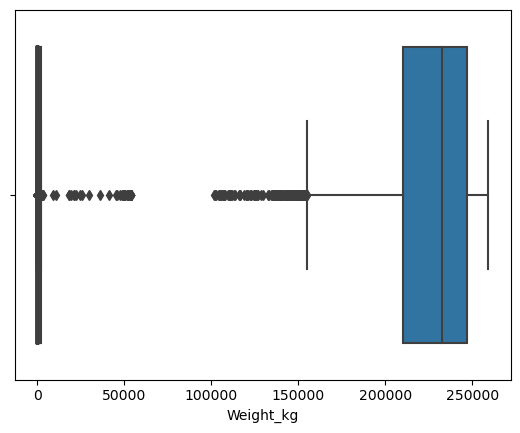

In [19]:
#6/Check for outliers and handle them
for column in df.columns:
    if is_numeric_dtype(df[column]):
        sns.boxplot(x=df[column])


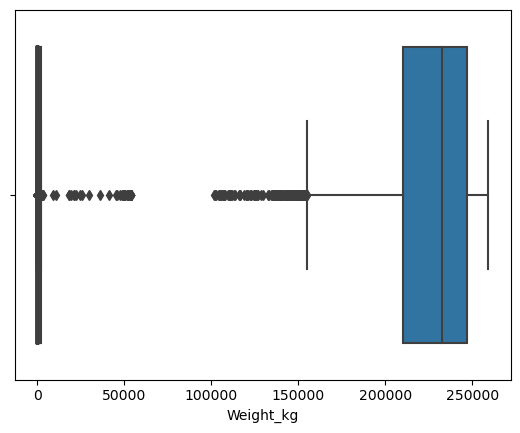

In [20]:
for column in df.select_dtypes(include=['int', 'float']):
    sns.boxplot(x=df[column])

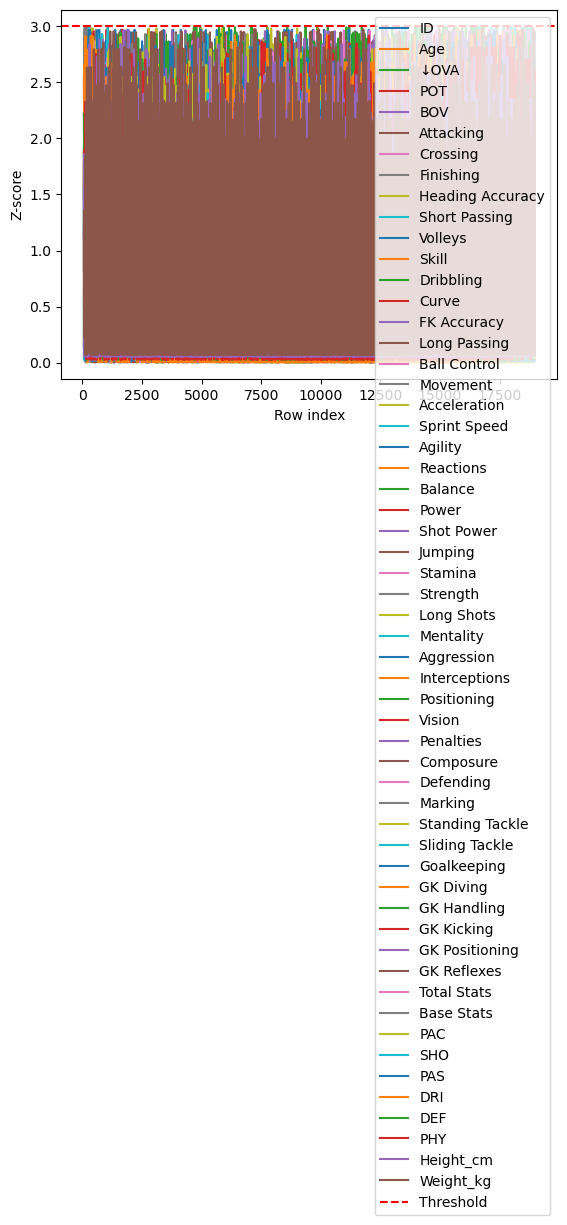

In [28]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code for detecting and removing outliers

outlier_indices = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        z = np.abs(stats.zscore(df[column]))
        threshold = 3
        outliers = np.where(z > threshold)[0]
        outlier_indices.extend(outliers)

while len(outlier_indices) > 0:
    # Remove rows with outliers
    df = df.drop(df.index[outlier_indices])
    
    # Re-calculate the Z-scores for numeric columns
    outlier_indices = []
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            z = np.abs(stats.zscore(df[column]))
            outliers = np.where(z > threshold)[0]
            outlier_indices.extend(outliers)
    
    if len(outlier_indices) == 0:
        break

# Plot the process
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        z = np.abs(stats.zscore(df[column]))
        plt.plot(z, label=column)

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Row index')
plt.ylabel('Z-score')
plt.legend()
plt.show()


In [ ]:
#Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!
  # convert the 'Joined' column to datetime format
df['Joined'] = pd.to_datetime(df['Joined'])


In [ ]:
   # calculate the age of each person in the new column
now = datetime.now()
df['Contract_duration'] = (now - df['Joined']).astype('<m8[Y]') #astype('<m8[Y]') is a method used to convert a datetime64[ns] column in pandas to a year-based timedelta64[ns] column

In [ ]:
df[df['Contract_duration']>10] # and we retrieve the players whose contract is older than 10 years

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height_cm,Weight_kg,Contract_duration
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,85,92,91,95,38,65,771,170.0,72.0,18.0
14,167495,M. Neuer,Manuel Neuer,https://cdn.sofifa.com/players/167/495/21_60.png,http://sofifa.com/player/167495/manuel-neuer/2...,Germany,34,89,89,\n\n\n\nFC Bayern München,...,87,87,91,89,57,86,118,193.0,92.0,11.0
15,165153,K. Benzema,Karim Benzema,https://cdn.sofifa.com/players/165/153/21_60.png,http://sofifa.com/player/165153/karim-benzema/...,France,32,89,89,\n\n\n\nReal Madrid,...,74,85,81,86,40,76,216,185.0,81.0,13.0
16,155862,Sergio Ramos,Sergio Ramos García,https://cdn.sofifa.com/players/155/862/21_60.png,http://sofifa.com/player/155862/sergio-ramos-g...,Spain,34,89,89,\n\n\n\nReal Madrid,...,71,70,76,73,88,85,212,184.0,82.0,17.0
17,153079,S. Agüero,Sergio Agüero,https://cdn.sofifa.com/players/153/079/21_60.png,http://sofifa.com/player/153079/sergio-aguero/...,Argentina,32,89,89,\n\n\n\nManchester City,...,78,90,77,88,33,73,154,173.0,70.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,219936,M. Al Wakid,Mohammed Al Wakid,https://cdn.sofifa.com/players/219/936/21_60.png,http://sofifa.com/player/219936/mohammed-al-wa...,Saudi Arabia,28,57,57,\n\n\n\nAl Hilal,...,58,57,53,55,42,55,NaN,182.0,82.0,13.0
17021,256950,J. Huysman,Jérémy Huysman,https://cdn.sofifa.com/players/256/950/21_60.png,http://sofifa.com/player/256950/jeremy-huysman...,France,31,57,57,\n\n\n\nUSL Dunkerque,...,49,26,30,30,59,67,NaN,188.0,84.0,11.0
17032,247196,Luo Yi,Yi Luo,https://cdn.sofifa.com/players/247/196/21_60.png,http://sofifa.com/player/247196/yi-luo/210006/,China PR,33,57,57,\n\n\n\nWuhan Zall,...,65,48,54,56,52,52,NaN,175.0,64.0,11.0
17073,102881,K. Stamatopoulos,Kyriakos Stamatopoulos,https://cdn.sofifa.com/players/102/881/21_60.png,http://sofifa.com/player/102881/kyriakos-stama...,Canada,40,57,57,\n\n\n\nAIK,...,57,52,54,56,33,57,NaN,188.0,80.0,12.0


'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. 
For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18979 entries, 0 to 18978
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 18979 non-null  int64         
 1   Name               18979 non-null  object        
 2   LongName           18979 non-null  object        
 3   photoUrl           18979 non-null  object        
 4   playerUrl          18979 non-null  object        
 5   Nationality        18979 non-null  object        
 6   Age                18979 non-null  int64         
 7   ↓OVA               18979 non-null  int64         
 8   POT                18979 non-null  int64         
 9   Club               18979 non-null  object        
 10  Contract           18979 non-null  object        
 11  Positions          18979 non-null  object        
 12  Weight             18979 non-null  object        
 13  Preferred Foot     18979 non-null  object        
 14  BOV   

In [ ]:
def value_wage_releaseClause(to_format):
    if 'M' in to_format:
        to_format = to_format.replace('€','')
        to_format = to_format.replace('M','')
        to_format = float(to_format)*1000000.0
        
    elif 'K' in to_format:
        to_format = to_format.replace('€','')
        to_format = to_format.replace('K','')
        to_format = float(to_format)*1000.0
    return to_format    


list = ['Value','Wage','Release Clause']
for elem in list:
    df[elem+'_formatted'] = df[elem].apply(value_wage_releaseClause)



In [ ]:
df[['Value_formatted','Release Clause_formatted','Wage_formatted']] # the new formatted column

,Value_formatted,Release Clause_formatted,Wage_formatted
0,103500000.0,138400000.0,560000.0
1,63000000.0,75900000.0,220000.0
2,120000000.0,159400000.0,125000.0
3,129000000.0,161000000.0,370000.0
4,132000000.0,166500000.0,270000.0
...,...,...,...
18974,100000.0,70000.0,1000.0
18975,130000.0,165000.0,€500
18976,120000.0,131000.0,€500
18977,100000.0,88000.0,2000.0


In [ ]:
#we just have to drop the olmd columns
df = df.drop(['Wage','Value','Release Clause'], axis=1)

Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical

In [ ]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'Height_cm',
       'Weight_kg', 'Contract_duration', 

In [ ]:
# pd.set_option('display.max_columns', None) # displaying all the columns of the dataframe
# pd.set_option('display.max_rows', None) # displaying all the row

In [ ]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,DRI,DEF,PHY,Hits,Height_cm,Weight_kg,Contract_duration,Value_formatted,Wage_formatted,Release Clause_formatted
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,95,38,65,771,170.0,72.0,18.0,103500000.0,560000.0,138400000.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,89,35,77,562,187.0,83.0,4.0,63000000.0,220000.0,75900000.0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,90,52,90,150,188.0,87.0,8.0,120000000.0,125000.0,159400000.0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,88,64,78,207,181.0,70.0,7.0,129000000.0,370000.0,161000000.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,94,36,59,595,175.0,68.0,5.0,132000000.0,270000.0,166500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,38,48,51,NaN,178.0,66.0,4.0,100000.0,1000.0,70000.0
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,49,35,45,NaN,175.0,65.0,2.0,130000.0,€500,165000.0
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,46,40,53,NaN,179.0,74.0,4.0,120000.0,€500,131000.0
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,49,30,44,NaN,175.0,69.0,2.0,100000.0,2000.0,88000.0


In [ ]:

# Iterate over the columns and check for stars
stars = []
for col in df.columns:
    if '★' in df[col].values:
        # append the columns in the empty list
        stars.append(col)


/var/folders/97/kcf9thns5z3_g34_y6xzwgkc0000gn/T/ipykernel_9959/898775851.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '★' in df[col].values:


In [ ]:
stars


[]

In [ ]:
df['Mentality']

0        347
1        353
2        140
3        408
4        356
        ... 
18974    192
18975    193
18976    230
18977    190
18978    185
Name: Mentality, Length: 18979, dtype: int64

Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)